In [25]:

# Statistical Learning Project

In [26]:
"""IMPORT OF PCK"""

import os
import glob
import tqdm
import re

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)


import pandas as pd
import numpy as np
from scipy import stats
import math
import scipy.signal as signal
import random

from pathlib import Path
from IPython.core.display import display, HTML #display(HTML(data.to_html())) to show all variables

In [27]:
"""DIRECTORY"""
os.getcwd()

'/Users/jorgemellado/Documents/GitHub/Stats_projetcs'

## 1/ Import of data

In [28]:
dta = pd.read_csv("bestsellerswithcategories.csv", header = 0, sep = ",")

## 2/ Data Wrangling

In [29]:
#Corrections for modelisation steps

dta["Genre"] = dta.Genre.replace(to_replace=['Fiction', 'Non Fiction'], value=[0, 1])
dta = dta.rename(columns={"User Rating": "Rating"})
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     550 non-null    object 
 1   Author   550 non-null    object 
 2   Rating   550 non-null    float64
 3   Reviews  550 non-null    int64  
 4   Price    550 non-null    int64  
 5   Year     550 non-null    int64  
 6   Genre    550 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 30.2+ KB


In [30]:
print(dta.head(5))
print(dta.tail(5))

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  Rating  Reviews  Price  Year  Genre  
0                  JJ Smith     4.7    17350      8  2016      1  
1              Stephen King     4.6     2052     22  2011      0  
2        Jordan B. Peterson     4.7    18979     15  2018      1  
3             George Orwell     4.7    21424      6  2017      0  
4  National Geographic Kids     4.8     7665     12  2019      1  
                                                  Name       Author  Rating  \
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)  Jeff Kinney     4.9   
546  You Are a Badass: How to Stop Doubting Your Gr...  Jen Sincero     4.7   
547  You Are a Badass: H

<b>
<b>

We can see from the tail of our dataset that there are the same book, a multiple time.

The only difference is the year, in term of features. We can imagine that it represent the year when the book pop_up or the year when it becomes a bestsellers.
After a quick verification on internet, we can see that it represents: The year when the book was past of bestsellings.
Lets create a feature representing the time the book had been a bestsellings.

In the next steps, we will treat this problematic.

## -- Cleaning of Name column
Due to case sensitivity, the same book, with a different writing, can be misinterpreted to a different one.
We can correct this errors of case sensitivity by putting all the name in upper case.

In [31]:
dta["Name"] = dta["Name"].str.upper()
#problem solved

## -- Cleaning of Author column

We identified some difference for the reference of some authors, such as J.K Rowling. To fix this error, we smooth out the author name to J.K Rowling (without space between ".")

In [32]:
#To correct the space problem for few authors
for index, value in dta["Author"].items():
    if value.startswith("J."):
        change = value.replace(" ","")
        dta.loc[index, "Author"] = change
    else:
        pass


Creation of a new column which corresponds to the sum of year being best-sellings in total for the previous ten years.
Next we show the graph corresponding

In [33]:
dta["sum_best"]=""
dta["sum_best"] = dta.groupby("Name").transform('count')

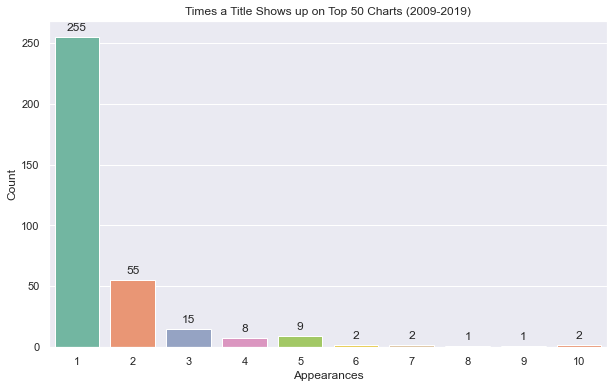

In [34]:
plt.figure(figsize=(10,6))

ax = sns.countplot(data=dta, x=dta.Name.value_counts(), palette="Set2");

for p in ax.patches:
    ax.annotate(format(p.get_height(), 'd'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

ax.set(xlabel="Appearances", ylabel="Count");
ax.set_title("Times a Title Shows up on Top 50 Charts (2009-2019)");
plt.show();

In [35]:
dta_repeat = pd.DataFrame([x, y] for x, y in dta.Author.value_counts().iteritems() if (y > 1))
dta_repeat.columns = ['Author','Top 50 Appearances']
dta_repeat.columns

Index(['Author', 'Top 50 Appearances'], dtype='object')

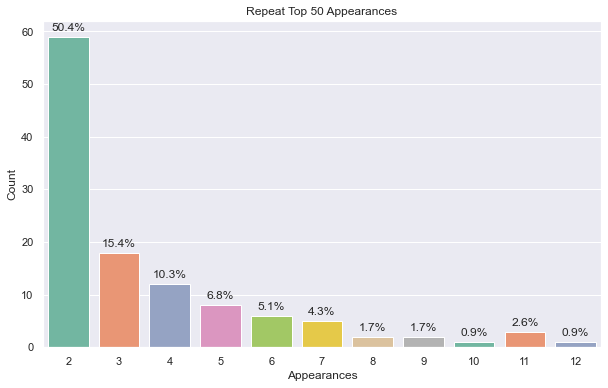

In [36]:
plt.figure(figsize=(10,6))

ax = sns.countplot(data=dta_repeat, x="Top 50 Appearances", palette="Set2");

for p in ax.patches:
    ax.annotate('{:.1%}'.format(p.get_height()/len(dta_repeat)),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

ax.set(xlabel="Appearances", ylabel="Count");
ax.set_title("Repeat Top 50 Appearances");
plt.show();


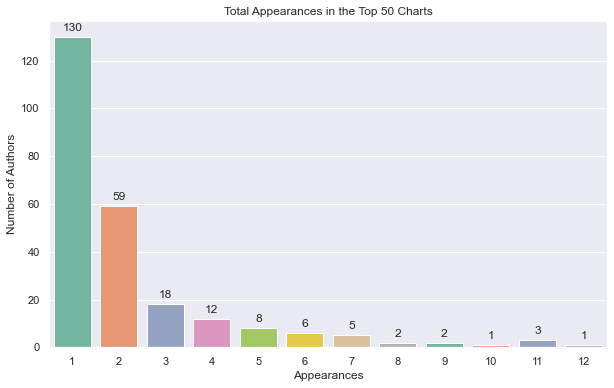

In [37]:
#Looking for redundancy in the authors

plt.figure(figsize=(10,6))

ax = sns.countplot(data=dta, x=dta.Author.value_counts(), palette="Set2")

for p in ax.patches:
    ax.annotate(format(p.get_height(), 'd'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

ax.set(xlabel="Appearances", ylabel="Number of Authors")
ax.set_title("Total Appearances in the Top 50 Charts")
plt.show()

## -- Basic statistics

In [38]:
dta.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rating,550.0,4.618364,0.226980,3.3,4.5,4.7,4.80,4.9
Reviews,550.0,11953.281818,11731.132017,37.0,4058.0,8580.0,17253.25,87841.0
Price,550.0,13.100000,10.842262,0.0,7.0,11.0,16.00,105.0
Year,550.0,2014.000000,3.165156,2009.0,2011.0,2014.0,2017.00,2019.0
Genre,550.0,0.563636,0.496385,0.0,0.0,1.0,1.00,1.0
sum_best,550.0,2.687273,2.385525,1.0,1.0,2.0,4.00,10.0


## -- Look for correlation

          sum_best      Year   Reviews     Price     Genre    Rating
sum_best  1.000000  0.070201  0.179402  0.146497  0.149126  0.039892
Year      0.070201  1.000000  0.263560 -0.153979  0.020868  0.242383
Reviews   0.179402  0.263560  1.000000 -0.109182 -0.280058 -0.001729
Price     0.146497 -0.153979 -0.109182  1.000000  0.182761 -0.133086
Genre     0.149126  0.020868 -0.280058  0.182761  1.000000 -0.116282
Rating    0.039892  0.242383 -0.001729 -0.133086 -0.116282  1.000000


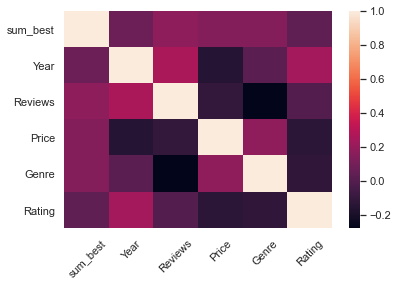

In [39]:
dta.shape

numerical = list(set(dta.columns) -
                 set(['Name','Author']))
corr_matrix = dta[numerical].corr()

sns.heatmap(corr_matrix);
plt.xticks(rotation=45);

print(corr_matrix)

-- Add

In [40]:
#Give an information on the dataset with the cosidered "best movies", with minimum 3000 review
data_order = dta.groupby(['Name', 'Author', 'Genre'], as_index=False)[['Rating', 'Reviews']].mean()
data_order = data_order[data_order['Reviews']>3000]
data_order = data_order.sort_values('Rating', ascending=False).head(20)
data_order


,Name,Author,Genre,Rating,Reviews
177,OBAMA: AN INTIMATE PORTRAIT,Pete Souza,1,4.9,3192.0
197,RUSH REVERE AND THE FIRST PATRIOTS: TIME-TRAVE...,Rush Limbaugh,0,4.9,3836.0
117,HARRY POTTER AND THE PRISONER OF AZKABAN: THE ...,J.K.Rowling,0,4.9,3146.0
118,HARRY POTTER AND THE SORCERER'S STONE: THE ILL...,J.K.Rowling,0,4.9,10052.0
112,HAMILTON: THE REVOLUTION,Lin-Manuel Miranda,1,4.9,5867.0
108,"GOODNIGHT, GOODNIGHT CONSTRUCTION SITE (HARDCO...",Sherri Duskey Rinker,0,4.9,7038.0
36,"BROWN BEAR, BROWN BEAR, WHAT DO YOU SEE?",Bill Martin Jr.,0,4.9,14344.0
311,THE WONDERFUL THINGS YOU WILL BE,Emily Winfield Martin,0,4.9,8842.0
66,DOG MAN AND CAT KID: FROM THE CREATOR OF CAPTA...,Dav Pilkey,0,4.9,5062.0
208,STRANGE PLANET (STRANGE PLANET SERIES),Nathan W. Pyle,0,4.9,9382.0


Use of weighted mean to attribute a review/rating which corresponds more to the reality field

with W_mean = ( ( v / m+v) * R) (( m / m+v)*C)

m = number of rating

C = mean Review

v= number of review

R = average numb of rating


In [41]:
# Weighted rating
m = min(dta['Reviews'])
C = dta['Rating'].mean()
def weighted_rating(x, m=m, C=C):
    v = x['Reviews']
    R = x['Rating']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [42]:
dta['Weighted Rating'] = dta.apply(weighted_rating, axis=1)

In [43]:
dta.groupby(['Name','Author','Genre'], as_index=False)[['Rating', 'Reviews', 'Weighted Rating']].mean().sort_values(by='Weighted Rating', ascending=False).head(10)

,Name,Author,Genre,Rating,Reviews,Weighted Rating
178,"OH, THE PLACES YOU'LL GO!",Dr. Seuss,0,4.9,21834.0,4.899524
114,HARRY POTTER AND THE CHAMBER OF SECRETS: THE I...,J.K.Rowling,0,4.9,19622.0,4.899470
139,JESUS CALLING: ENJOYING PEACE IN HIS PRESENCE ...,Sarah Young,1,4.9,19576.0,4.899469
309,THE VERY HUNGRY CATERPILLAR,Eric Carle,0,4.9,19546.0,4.899468
36,"BROWN BEAR, BROWN BEAR, WHAT DO YOU SEE?",Bill Martin Jr.,0,4.9,14344.0,4.899275
69,DOG MAN: FETCH-22: FROM THE CREATOR OF CAPTAIN...,Dav Pilkey,0,4.9,12619.0,4.899177
151,LAST WEEK TONIGHT WITH JOHN OLIVER PRESENTS A ...,Jill Twiss,0,4.9,11881.0,4.899126
118,HARRY POTTER AND THE SORCERER'S STONE: THE ILL...,J.K.Rowling,0,4.9,10052.0,4.898967
348,WRECKING BALL (DIARY OF A WIMPY KID BOOK 14),Jeff Kinney,0,4.9,9413.0,4.898897
208,STRANGE PLANET (STRANGE PLANET SERIES),Nathan W. Pyle,0,4.9,9382.0,4.898894


                 sum_best      Year   Reviews     Price     Genre  \
sum_best         1.000000  0.070201  0.179402  0.146497  0.149126   
Year             0.070201  1.000000  0.263560 -0.153979  0.020868   
Reviews          0.179402  0.263560  1.000000 -0.109182 -0.280058   
Price            0.146497 -0.153979 -0.109182  1.000000  0.182761   
Genre            0.149126  0.020868 -0.280058  0.182761  1.000000   
Weighted Rating  0.040111  0.241403 -0.003530 -0.132978 -0.114965   
Rating           0.039892  0.242383 -0.001729 -0.133086 -0.116282   

                 Weighted Rating    Rating  
sum_best                0.040111  0.039892  
Year                    0.241403  0.242383  
Reviews                -0.003530 -0.001729  
Price                  -0.132978 -0.133086  
Genre                  -0.114965 -0.116282  
Weighted Rating         1.000000  0.999949  
Rating                  0.999949  1.000000  


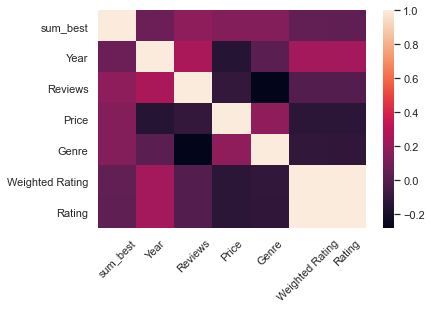

In [44]:
dta.shape

numerical = list(set(dta.columns) -
                 set(['Name','Author']))
corr_matrix = dta[numerical].corr()

sns.heatmap(corr_matrix);
plt.xticks(rotation=45);

print(corr_matrix)
